In [17]:
from math import *
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
sp.init_printing(use_unicode=True, use_latex='mathjax')
%matplotlib inline

In [18]:
VeloMPH = [] #Translational velocity of the baseball in MPH from Rapsodo
Velo = [] #Velocity in m/s
SpinM = [] #True spin of baseball in RPM
SpinS = [] #True spin of baseball in RPS
VertIN = [] #Vertical movement of each pitch from Rapsodo in inches
Vert = [] #Vertical movement in meters
HorIN = [] #Horizontal movement of each pitch in inches
Hor = [] #Horizontal movement in meters
Move = [] #Total movement in inches
CL = [] #Lift Coefficients for each pitch
S = [] #Spin factor for each pitch
SV = [] #Spin factor times velocity for each pitch
R = 0.076 #Radius of baseball in meters
A = R**2*np.pi #Cross sectional area of baseball in meters
P = 1.23 #kg/m^3 density of air at STP
XFT = 60.5 #Distance the ball travels in feet
Gam = 0.25 #N*s^2/m^4 for air at STP
D = 2*R #Diameter of baseball in meters
m = 0.145 #Mass of ball in kg

Import data

In [19]:
import csv
RapsodoData = []
m0 = r"C:\Users\Ryan\Desktop\Capstone\Final Project\Rapsodo Senior Project.csv" #Location of the .csv Excel file
with open(m0, newline='') as infile:
    InputReader = csv.reader(infile)
    InputHeader = next(InputReader)
    for line in InputReader:
        numline = [float(i) for i in line]
        RapsodoData.append(numline)
RapsodoData = np.array(RapsodoData)
VeloMPH = RapsodoData[:,0] #First column in Excel is velocity
SpinM = RapsodoData[:,1] #Second column is spin rate
HorIN = RapsodoData[:,2] #Third column is horizontal movement
VertIN = RapsodoData[:,3] #Fourth column is vertical movement

Calculate total movement in inches

In [20]:
for i in range(len(VeloMPH)):
    Move.append((VertIN[i]**2 + HorIN[i]**2)**(1/2))

Conversions

In [21]:
for i in range(len(VeloMPH)):
    Velo.append(VeloMPH[i] * 0.44704) #Miles per hour to meters per second
    SpinS.append(SpinM[i] / 60) #Rotations per minute to rotations per second
    Move[i] = Move[i] * 0.0254 #Inches to meters
    
X = XFT * 0.3048 #Feet to meters

Calculate lift coefficient in meters squared per rotation

In [22]:
for i in range(len(Velo)):
    CL.append((4*m/(P*A*Move[i]*Move[i]*SpinS[i]))*np.exp(Gam*D*D*X/m)) 

Calculate Spin Factor

In [23]:
for i in range(len(Velo)):
    S.append(R*SpinS[i]/Velo[i]) #Rotations
    SV.append(S[i]*Velo[i]) #Rotations times meters per second

Graphs

Text(0.5,1,'Lift Coefficient vs Spin Factor')

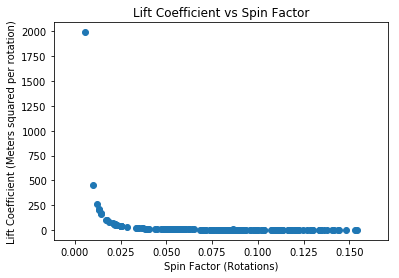

In [24]:
plt.scatter (S, CL)
plt.xlabel ("Spin Factor (Rotations)")
plt.ylabel ("Lift Coefficient (Meters squared per rotation)")
plt.title('Lift Coefficient vs Spin Factor')

Text(0.5,1,'Lift Coefficient vs Spin Factor * Velocity')

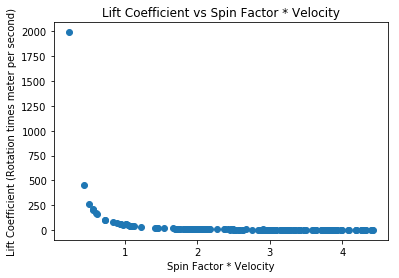

In [25]:
plt.scatter (SV, CL)
plt.xlabel ("Spin Factor * Velocity")
plt.ylabel ("Lift Coefficient (Rotation times meter per second)")
plt.title ('Lift Coefficient vs Spin Factor * Velocity')

One of the two graphs above should show a linear relationship. Nathan says that the Lift Coefficient vs Spin Factor should be a linear relationship while Briggs says the Lift Coefficient vs Spin Factor Times Velocity should be a linear realtionship.

Text(0.5,1,'Lift Coefficient vs Velocity')

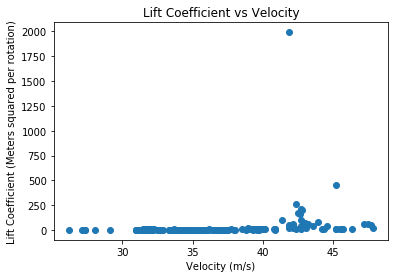

In [26]:
plt.scatter (Velo, CL)
plt.xlabel ("Velocity (m/s)")
plt.ylabel ("Lift Coefficient (Meters squared per rotation)")
plt.title('Lift Coefficient vs Velocity')

This graph is a little interesting because there does not seem to be a relationship between the lift coefficient and the velocity.

Text(0.5,1,'Lift Coefficient vs Spin Rate')

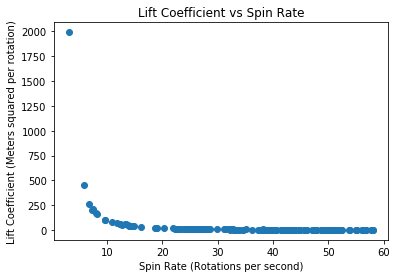

In [27]:
plt.scatter (SpinS, CL)
plt.xlabel ("Spin Rate (Rotations per second)")
plt.ylabel ("Lift Coefficient (Meters squared per rotation)")
plt.title('Lift Coefficient vs Spin Rate')

This graph is very similar to the Lift Coefficient vs Spin Factor Times Velocity graph because the spin factor times velocity is just the radius of the ball times the spin rate.